In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
# salary = np.random.randint(20, 30, 50, dtype=int)

In [105]:
salary = [27, 29, 29, 23, 28, 22, 29, 28, 23, 29, 22, 26, 23, 20, 21, 24, 23,
       26, 28, 22, 25, 28, 23, 27, 27, 25, 21, 22, 27, 28, 26, 22, 22, 28,
       25, 26, 28, 25, 23, 29, 25, 22, 27, 24, 22, 25, 23, 20, 27, 21,98,90, 98, 87, 84,90]

In [106]:
#five point summary 
# min, 25th, 50th, 75th, 100th

np.quantile(salary, [0.25, 0.5, 0.75, 1.0])

array([23. , 25.5, 28. , 98. ])

In [107]:
df = pd.DataFrame(salary, columns=["salary"])

In [108]:
df.describe()

,salary
count,56.000000
mean,32.000000
std,20.915414
min,20.000000
25%,23.000000
50%,25.500000
75%,28.000000
max,98.000000


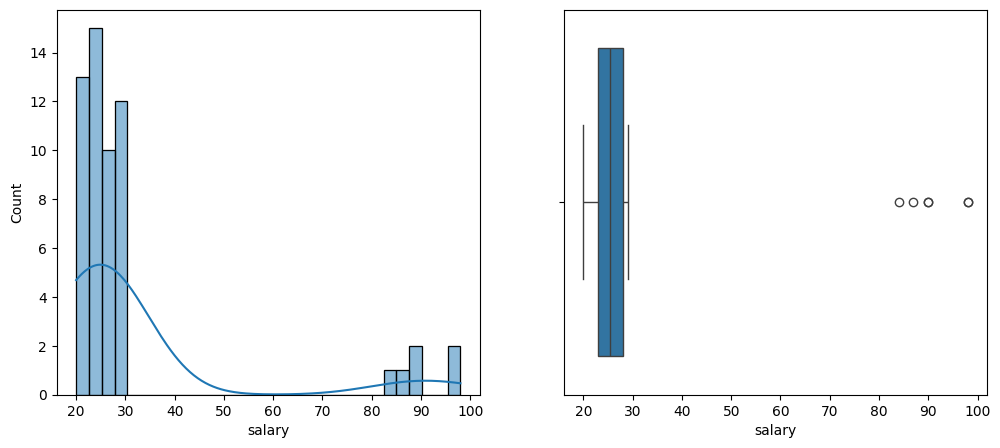

In [149]:
# Draw a outlier>> histplot and boxplot


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x="salary", data=df, kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(x="salary", data=df)
plt.show()

In [110]:
# Drop the outlier
# Capping the outlier
# replace with mean/median


In [113]:
# Drop outlier

Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)

In [114]:
IQR = Q3 - Q1

In [127]:
upper_fence = Q3 + 1.5*(IQR)
lower_fence = Q1 - 1.5*(IQR)

In [128]:
lower_fence

15.5

In [129]:
upper_fence

35.5

In [131]:
df_drop=df[(df.salary >= lower_fence) & (df.salary<= upper_fence)]

In [157]:
# imputing the outlier with mean and median

df['salary_imputed_mean']= np.where((df.salary<= lower_fence) | (df.salary>= upper_fence), df['salary'].mean(), df['salary'])
df['salary_imputed_median']= np.where((df.salary<= lower_fence) | (df.salary>= upper_fence), df['salary'].median(), df['salary'])

In [158]:
df

,salary,salary_imputed_mean,Salary_capped,salary_imputed_median
0,27,27.0,27.0,27.0
1,29,29.0,29.0,29.0
2,29,29.0,29.0,29.0
3,23,23.0,23.0,23.0
4,28,28.0,28.0,28.0
5,22,22.0,22.0,22.0
6,29,29.0,29.0,29.0
7,28,28.0,28.0,28.0
8,23,23.0,23.0,23.0
9,29,29.0,29.0,29.0


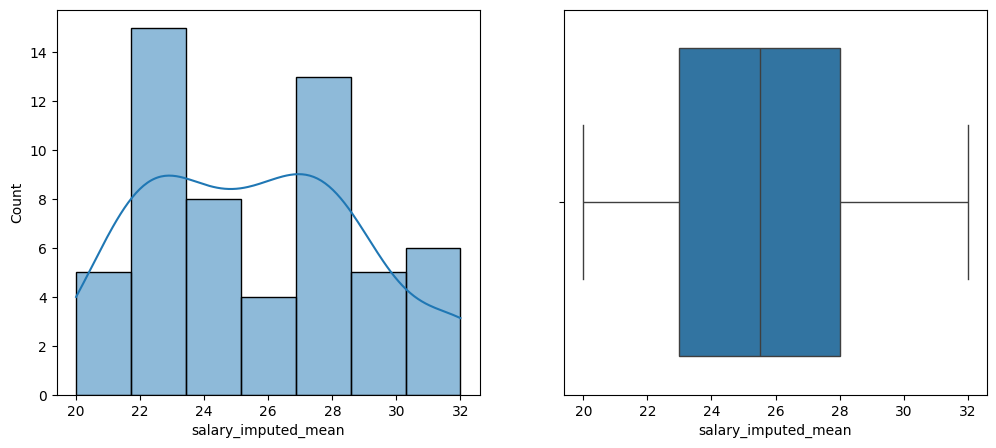

In [159]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x="salary_imputed_mean", data=df, kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(x="salary_imputed_mean", data=df)
plt.show()

In [160]:
# capping >> replacing with nearet value 

In [161]:
lower_cap = df['salary'].quantile(0.05) # Lower cap as 5th percentile
upper_cap = df["salary"].quantile(0.95) # Upper cap as 95th percentile

In [162]:
lower_cap, upper_cap

(21.0, 90.0)

In [163]:
df["Salary_capped"]=np.where(df.salary<lower_cap, lower_cap,np.where(df.salary>upper_cap, upper_cap, df['salary']) )

In [164]:
df

,salary,salary_imputed_mean,Salary_capped,salary_imputed_median
0,27,27.0,27.0,27.0
1,29,29.0,29.0,29.0
2,29,29.0,29.0,29.0
3,23,23.0,23.0,23.0
4,28,28.0,28.0,28.0
5,22,22.0,22.0,22.0
6,29,29.0,29.0,29.0
7,28,28.0,28.0,28.0
8,23,23.0,23.0,23.0
9,29,29.0,29.0,29.0
